## CSE391 F2018 Data Science
### Quiz 3

1. Read the file Email.csv
2. Are there any outlier email? find them and discard them
3. Plot the histogram of email counts? what distribution do you think the counts might have?
4. Find the category of the emails with minimum count when the remove the delete emails. Print out the minimum number

In [1]:
import pandas as pd
import numpy as np
import datetime as dtime
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


#filepath = '/Users/martin/Documents/MyLecturesSBU/Fall2018/CSE391/data/titanic_train.csv'
filepath = '/Users/nafi/Downloads/Emails.csv'
emails = pd.read_csv(filepath)
emails

,Unnamed: 0,Email,Action,Count,AvgLatency,Date
0,76416,tgf@spam.ca,delete,12.0,0.086650,2017-12-01
1,42976,jqt@microsoft.com,send,8.0,2.323563,2017-12-10
2,22555,dst@outlook.com,move,4.0,0.078658,2017-12-18
3,17788,obq@hotmail.com,delete,8.0,0.953102,2017-12-25
4,104412,vld@hotmail.com,read,48.0,1.289782,2017-12-04
5,73285,xmk@yahoo.com,read,12.0,0.086650,2017-12-01
6,104059,olc@gmail.com,read,8.0,0.326858,2017-12-23
7,73034,gkd@gmail.com,move,4.0,1.148872,2017-12-29
8,25215,ksr@hotmail.com,delete,5.0,0.469255,2017-12-12
9,6170,ktg@gmail.com,move,1.0,0.086650,2017-12-01


In [2]:
### the count stuff!!!!
q1_ct = emails['Count'].quantile(0.25)
q3_ct = emails['Count'].quantile(0.75)
iqr_ct = q3_ct- q1_ct
# emails.hist(column='Count')
##df = stepframe[~((email[] < (Q1 - 1.5 * IQR)) |(stepframe > (Q3 + 1.5 * IQR))).any(axis=1)]
emails = emails[~((emails["Count"] < (q1_ct-1.5*iqr_ct)) | (emails['Count'] > (q3_ct + 1.5 *iqr_ct)))]
# x_ct


In [4]:
### the average latency stuff
q1_lat = emails['AvgLatency'].quantile(0.25)
q2_lat = emails['AvgLatency'].quantile(0.50)
q3_lat = emails['AvgLatency'].quantile(0.75)
iqr_lat = q3_lat- q1_lat
##df = stepframe[~((email[] < (Q1 - 1.5 * IQR)) |(stepframe > (Q3 + 1.5 * IQR))).any(axis=1)]
x_lat = emails[~((emails["AvgLatency"] < (q1_lat-1.5*iqr_lat)) | (emails['AvgLatency'] > (q3_lat + 1.5 *iqr_lat)))]
x_lat

,Unnamed: 0,Email,Action,Count,AvgLatency,Date
0,76416,tgf@spam.ca,delete,12.0,0.086650,2017-12-01
2,22555,dst@outlook.com,move,4.0,0.078658,2017-12-18
3,17788,obq@hotmail.com,delete,8.0,0.953102,2017-12-25
4,104412,vld@hotmail.com,read,48.0,1.289782,2017-12-04
5,73285,xmk@yahoo.com,read,12.0,0.086650,2017-12-01
6,104059,olc@gmail.com,read,8.0,0.326858,2017-12-23
7,73034,gkd@gmail.com,move,4.0,1.148872,2017-12-29
8,25215,ksr@hotmail.com,delete,5.0,0.469255,2017-12-12
9,6170,ktg@gmail.com,move,1.0,0.086650,2017-12-01
10,66466,bot@gmail.com,read,3.0,0.006954,2017-12-02


In [48]:
x_lat['Date'] = pd.to_datetime(x_lat['Date'], format='%Y-%m-%d')

q1_dt =  x_lat['Date'].quantile(0.25)
q2_dt = x_lat['Date'].quantile(0.50)
q3_dt = x_lat['Date'].quantile(0.75)
iqr_dt =q3_dt - q1_dt

x_lat = x_lat[~((x_lat["Date"] < (q1_dt-1.5*iqr_dt)) | (x_lat['Date'] > (q3_dt + 1.5 *iqr_dt)))]

x_lat["Date"] = x_lat["Date"].dt.date
x_lat

,Unnamed: 0,Email,Action,Count,AvgLatency,Date
0,76416,tgf@spam.ca,delete,12.0,0.086650,2017-12-01
2,22555,dst@outlook.com,move,4.0,0.078658,2017-12-18
3,17788,obq@hotmail.com,delete,8.0,0.953102,2017-12-25
4,104412,vld@hotmail.com,read,48.0,1.289782,2017-12-04
5,73285,xmk@yahoo.com,read,12.0,0.086650,2017-12-01
6,104059,olc@gmail.com,read,8.0,0.326858,2017-12-23
7,73034,gkd@gmail.com,move,4.0,1.148872,2017-12-29
8,25215,ksr@hotmail.com,delete,5.0,0.469255,2017-12-12
9,6170,ktg@gmail.com,move,1.0,0.086650,2017-12-01
10,66466,bot@gmail.com,read,3.0,0.006954,2017-12-02


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3BF5605F8>]], dtype=object)

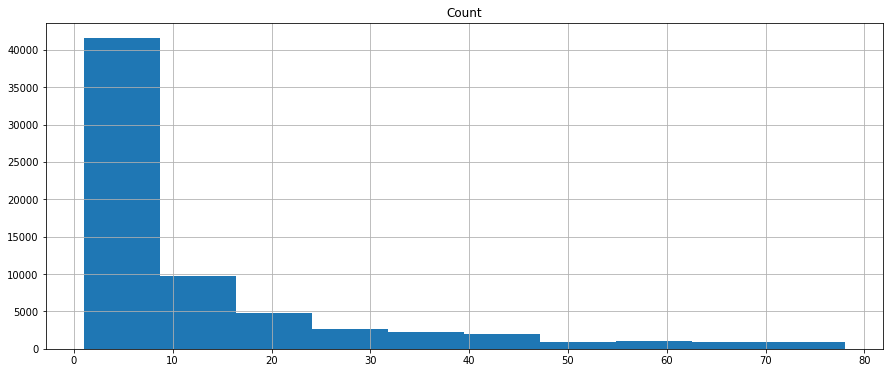

In [51]:
x_lat.hist(column = 'Count')

In [52]:
x_lat['Email'].count()

66883

In [55]:
x_lat = x_lat[x_lat['Action'] != 'delete']
x_lat

,Unnamed: 0,Email,Action,Count,AvgLatency,Date
2,22555,dst@outlook.com,move,4.0,0.078658,2017-12-18
4,104412,vld@hotmail.com,read,48.0,1.289782,2017-12-04
5,73285,xmk@yahoo.com,read,12.0,0.086650,2017-12-01
6,104059,olc@gmail.com,read,8.0,0.326858,2017-12-23
7,73034,gkd@gmail.com,move,4.0,1.148872,2017-12-29
9,6170,ktg@gmail.com,move,1.0,0.086650,2017-12-01
10,66466,bot@gmail.com,read,3.0,0.006954,2017-12-02
11,62336,bny@fb.com,send,9.0,0.752070,2017-12-26
14,80244,oxs@outlook.com,read,15.0,0.169602,2017-12-16
15,97946,ree@spam.ca,move,8.0,0.834500,2017-12-17


In [85]:
dict = {}
for tk in x_lat["Email"]:
    tkn = str(tk)
    if tkn != 'nan':
        proc = tkn.split("@")
        token = proc[1]
        if token not in dict:
            dict[token] = token

l = []

for key in dict:
    g =  x_lat[x_lat['Email'].str.contains(key)]
    l.append(  g["Count"].sum()    )

l.sort()
print(l[0 ]   )


84152.0
